In [2]:
import cv2, os, sys, time
import numpy as np
import torch
import matplotlib.pyplot as plt


In [10]:
# Utility functions
def sammTstUtlLoadAnImage(pathfile):
    """
    In:
    -----
        pathfile: path to an image
    
        
    Out:
    -----
        img: numpy array of the image
    """
    
    img = cv2.imread(pathfile)

    return img

def sammTstUtlLoadImages(pathfolder):
    """
    In:
    -----
        pathfolder: path to an image folder

    Out:
    -----
        imgs: list of the images, each image is a numpy array
    """

    imgs = []
    for file in os.listdir(pathfolder):
        img = cv2.imread(os.path.join(pathfolder, file))
        imgs.append(img)
    
    return imgs

def sammTstUtlShowImage(img):
    """
    In:
    -----
        img: numpy array of the image
    
    Out:
    -----
        None (plot image)
    """  
    plt.figure(figsize=(10,10))
    plt.imshow(img)  
    return

def sammTstUtlShowInferedImage(img, point, label, mask):
    """
    In:
    -----
        img: numpy array of the image
        point: (x,y) coordinates of the prompt point
        label: label of the prompt point
        mask: numpy array of the mask
    
    Out:
        None (plot image-prompt-mask overlay)
    """
    plt.figure(figsize=(10,10))
    plt.imshow(img)

    # Plot prompt point
    pos_points = point[label==1]
    neg_points = point[label==0]

    plt.scatter(pos_points[:, 0], pos_points[:, 1], color='red', marker='o', s=375, edgecolor='white', linewidth=1.25)
    plt.scatter(neg_points[:, 0], neg_points[:, 1], color='green', marker='o', s=375, edgecolor='white', linewidth=1.25)

    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    plt.imshow(mask_image)


    return

In [13]:
# SAM stuff
# Refer https://github.com/facebookresearch/segment-anything/tree/main/notebooks

def sammTstSamInferenceImage(img, point, label, predictor):
    """
    In:
    -----
        img: numpy array of the image
        point: numpy array of the point
        label: numpy array of the label
        predictor: SamPredictor object

    Out:
    -----
        outmask: numpy array of the output mask
    """    

    predictor.set_image(img)

    # Get the mask
    outmask, __, __ = predictor.predict(
        point,
        label,
        multimask_output=False
    )
    
    # the shape of outmask is 1 x H x W
    return outmask

def sammTstSamInferenceImages(imgs, points, labels, predictor):
    """
    Predictors for multi-images, multi-prompts, multi-labels
    In:
    -----
        imgs: numpy array of the image
        points: numpy array of the point
        labels: numpy array of the label
        predictor: SamPredictor object

    Out:
    -----
        outmask: numpy array of the output mask
    """    

    outmasks = []

    for img in imgs:
        predictor.set_image(img)

        # Get the mask
        outmask, __, __ = predictor.predict(
            points,
            labels,
            multimask_output=False
        )
        
        # the shape of outmask is 1 x H x W
        outmasks.append(outmask)

    
    return outmasks

In [ ]:
# SAMM stuff
# Refer https://github.com/bingogome/samm/blob/b802bbae437b1c0a0c1e236a7b24dfa89e2b3d7e/samm-python-terminal/sam_server.py
def sammTstSaveEmbeddings():
    """
    In:
        imgs
    Out:
        embpath
    """
    
    return embpath

def sammTstRetrieveEmbeddings():
    """
    In:
        embpath
    Out:
        emb
    """
    
    return emb

def sammTstInferWtRetrievedEmbeddings():
    """
    In:
        imgs
        points
        labels
        emb
    Out:
        outmasks
    """
    
    return outmasks

In [7]:
# Test scrips
from segment_anything import sam_model_registry, SamPredictor

sam_model_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_model_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)



/home/jeremy/anaconda3/envs/samm/lib/python3.11/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


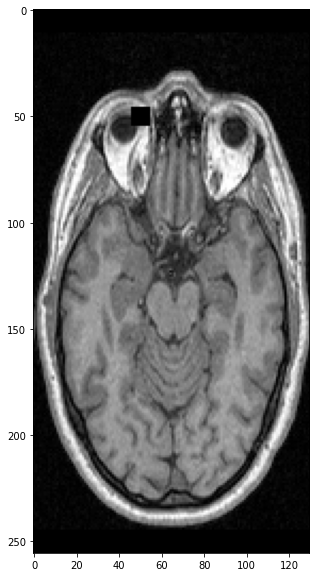

In [18]:
img = sammTstUtlLoadAnImage('testimg.png')
sammTstUtlShowImage(img)

point = np.array([[100, 100],[40, 60]])
label = np.array([1,1])

mask = sammTstSamInferenceImage(img, point, label, predictor=predictor)

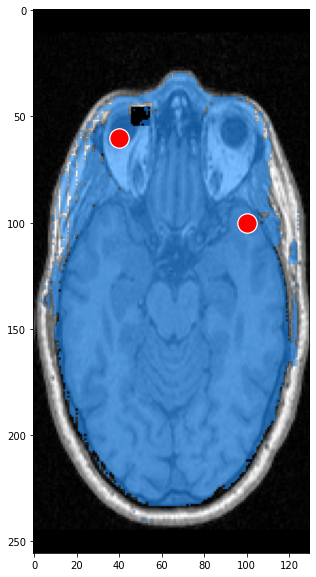

In [19]:
sammTstUtlShowInferedImage(img,point,label,mask)